# Saving and Restoring Models

* Once you train your models, you may save it and reload it later.
* You may save just the weights or the whole architecture 
* Saving the model includin the architecture uses bit more space but well worth it


In [7]:
# Import standard libraries that you may use most times
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

# -------------------------------------------------------------------------
# 1. Some book keeping    
print("TensorFlow version:", tf.__version__)


# 2. Load the data set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to 0 through 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Shape of the data", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# -------------------------------------------------------------------------
def plot( x=x_train, y= y_train, image_index=888, yh=""):
    plt.imshow(x[image_index], cmap='Greys');
    plt.title (f"{y[image_index]}: ^{yh}" );
    plt.tick_params(left= False, labelleft = False , labelbottom = False, bottom = False)

# -------------------------------------------------------------------------
# 3. Create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

# -------------------------------------------------------------------------
# 4 Compile and fit the model

# Creating custom call backs => you may use call backs to save models automatically
class Callback2Save(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print(f">>> Callback2Save: Training Start; keys: {keys}")

    def on_train_end(self, logs=None):
        print(f">>> Callback2Save: Training End  of training; {self.model}")

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, verbose= False, callbacks=[ Callback2Save()])


TensorFlow version: 2.11.0
Shape of the data (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
>>> Callback2Save: Training Start; keys: []
>>> Callback2Save: Training End  of training; <keras.engine.sequential.Sequential object at 0x7fc9a1392a60>


In [9]:
!ls -l model

ls: model: No such file or directory


In [10]:
model.save("model", overwrite=True, include_optimizer=True )
# You should see the file if it is not already saved with new date and time

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [12]:
!ls -l model

total 208
drwxr-xr-x  2 snarayan  wheel     64 Jan 22 14:28 assets
-rw-r--r--  1 snarayan  wheel     56 Jan 22 14:28 fingerprint.pb
-rw-r--r--  1 snarayan  wheel   8709 Jan 22 14:28 keras_metadata.pb
-rw-r--r--  1 snarayan  wheel  86838 Jan 22 14:28 saved_model.pb
drwxr-xr-x  4 snarayan  wheel    128 Jan 22 14:28 variables


### Test Model

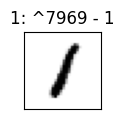

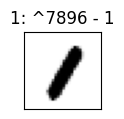

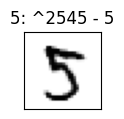

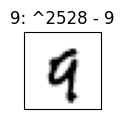

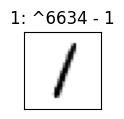

In [11]:
# Lets load the model and use it for modelling or coninuous training

model1 = tf.keras.models.load_model("model") # compile=True
for j in range(5):
    i=random.randint(0,len(x_test))
    plt.figure(figsize=(1,1))
    p = model1(x_test[i, np.newaxis])
    plot(x_test, y_test, i, f'{i} - {np.argmax(p)}')
    plt.show()
